<a href="https://colab.research.google.com/github/vaisshnavee1410/Support-Vector-Machine.ipynb/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUPPORT VECTOR MACHINE**

## **Dataset Selection:**

* **For this assignment, we'll utilize the widely recognized Mushroom Dataset**

### **Task 1: Exploratory Data Analysis (EDA):**

* **Load the Mushroom dataset and perform fundamental data exploration.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset
df = pd.read_csv('mushroom.csv')

* **Utilize histograms, box plots, or density plots to understand feature distributions.**

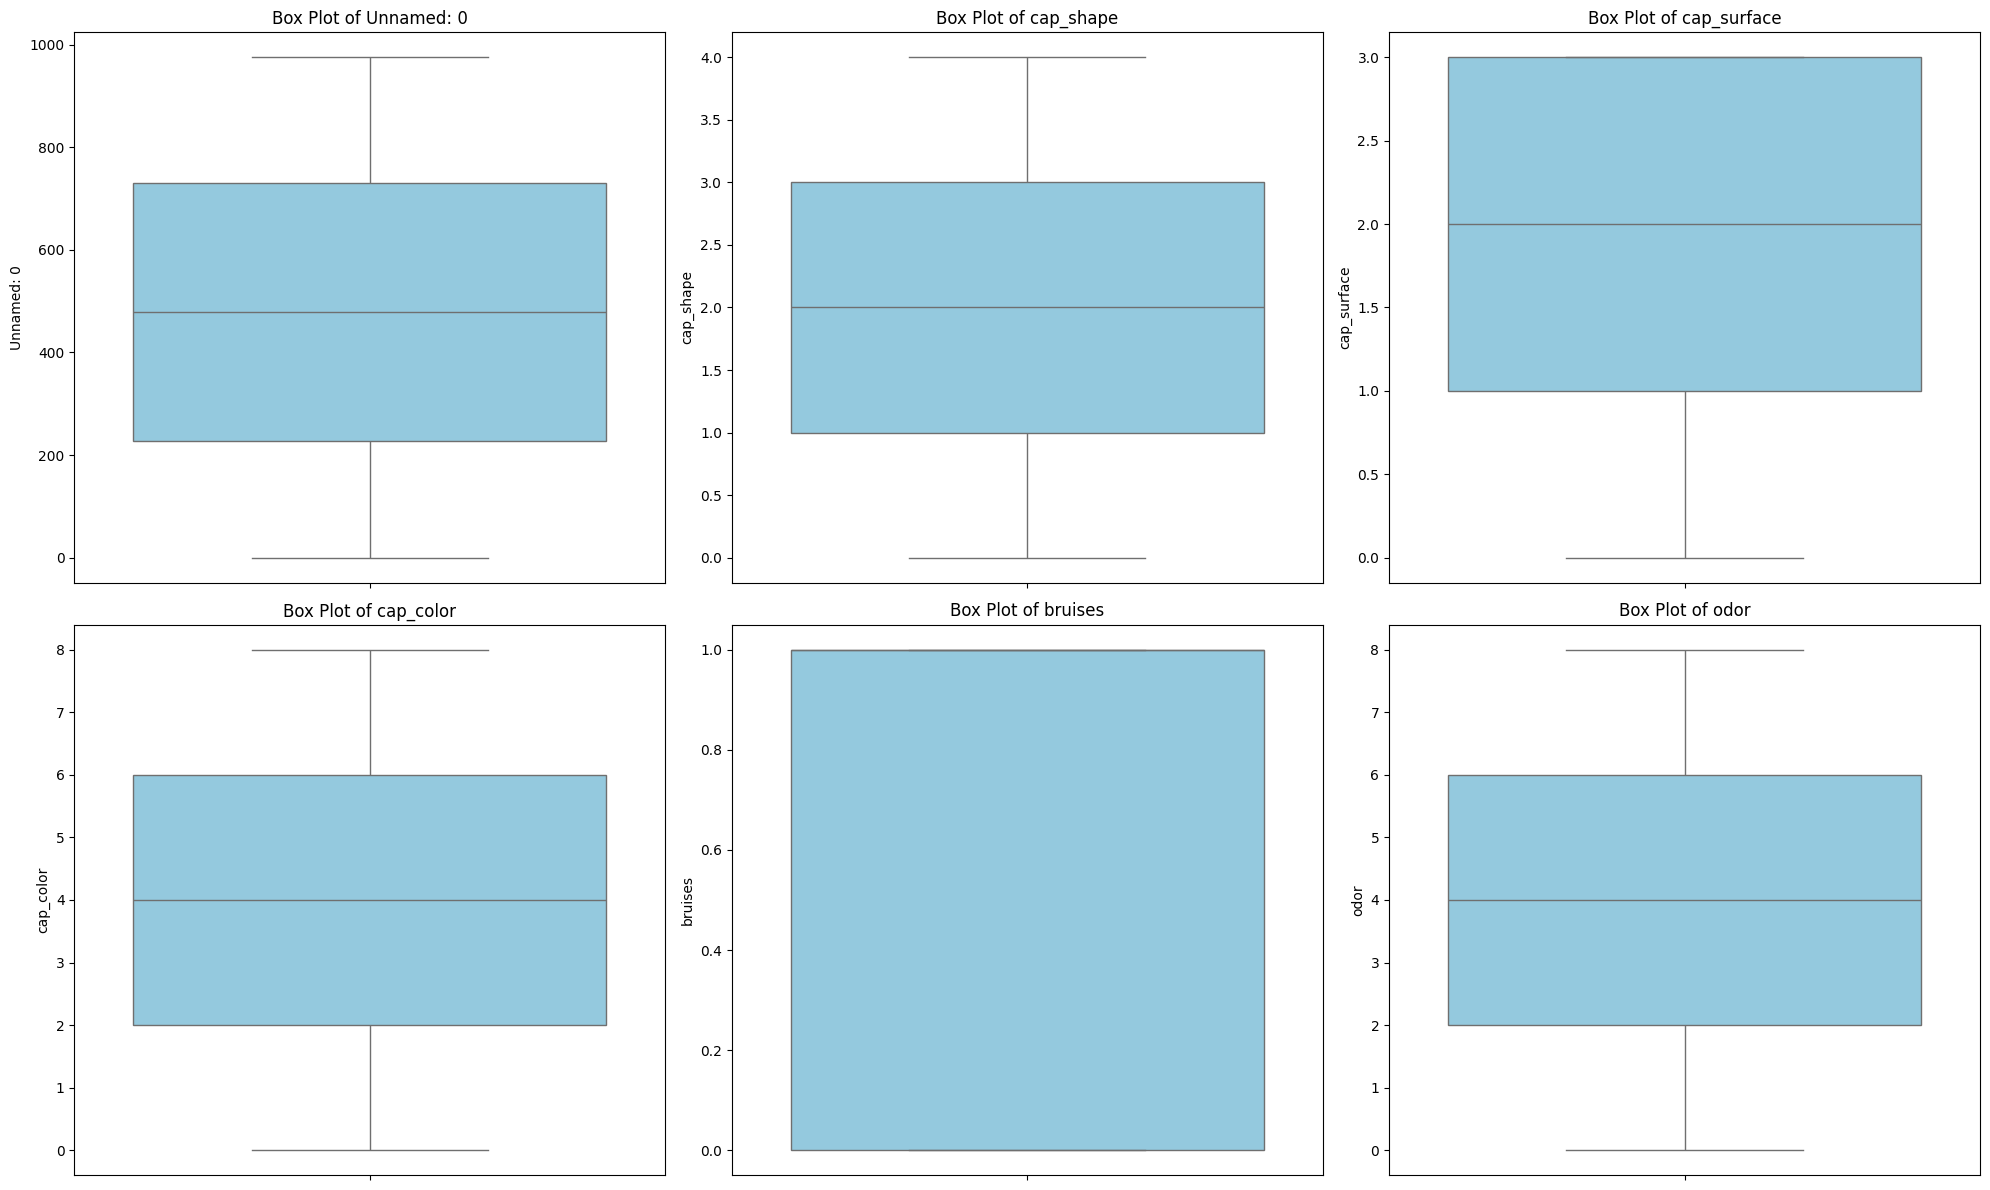

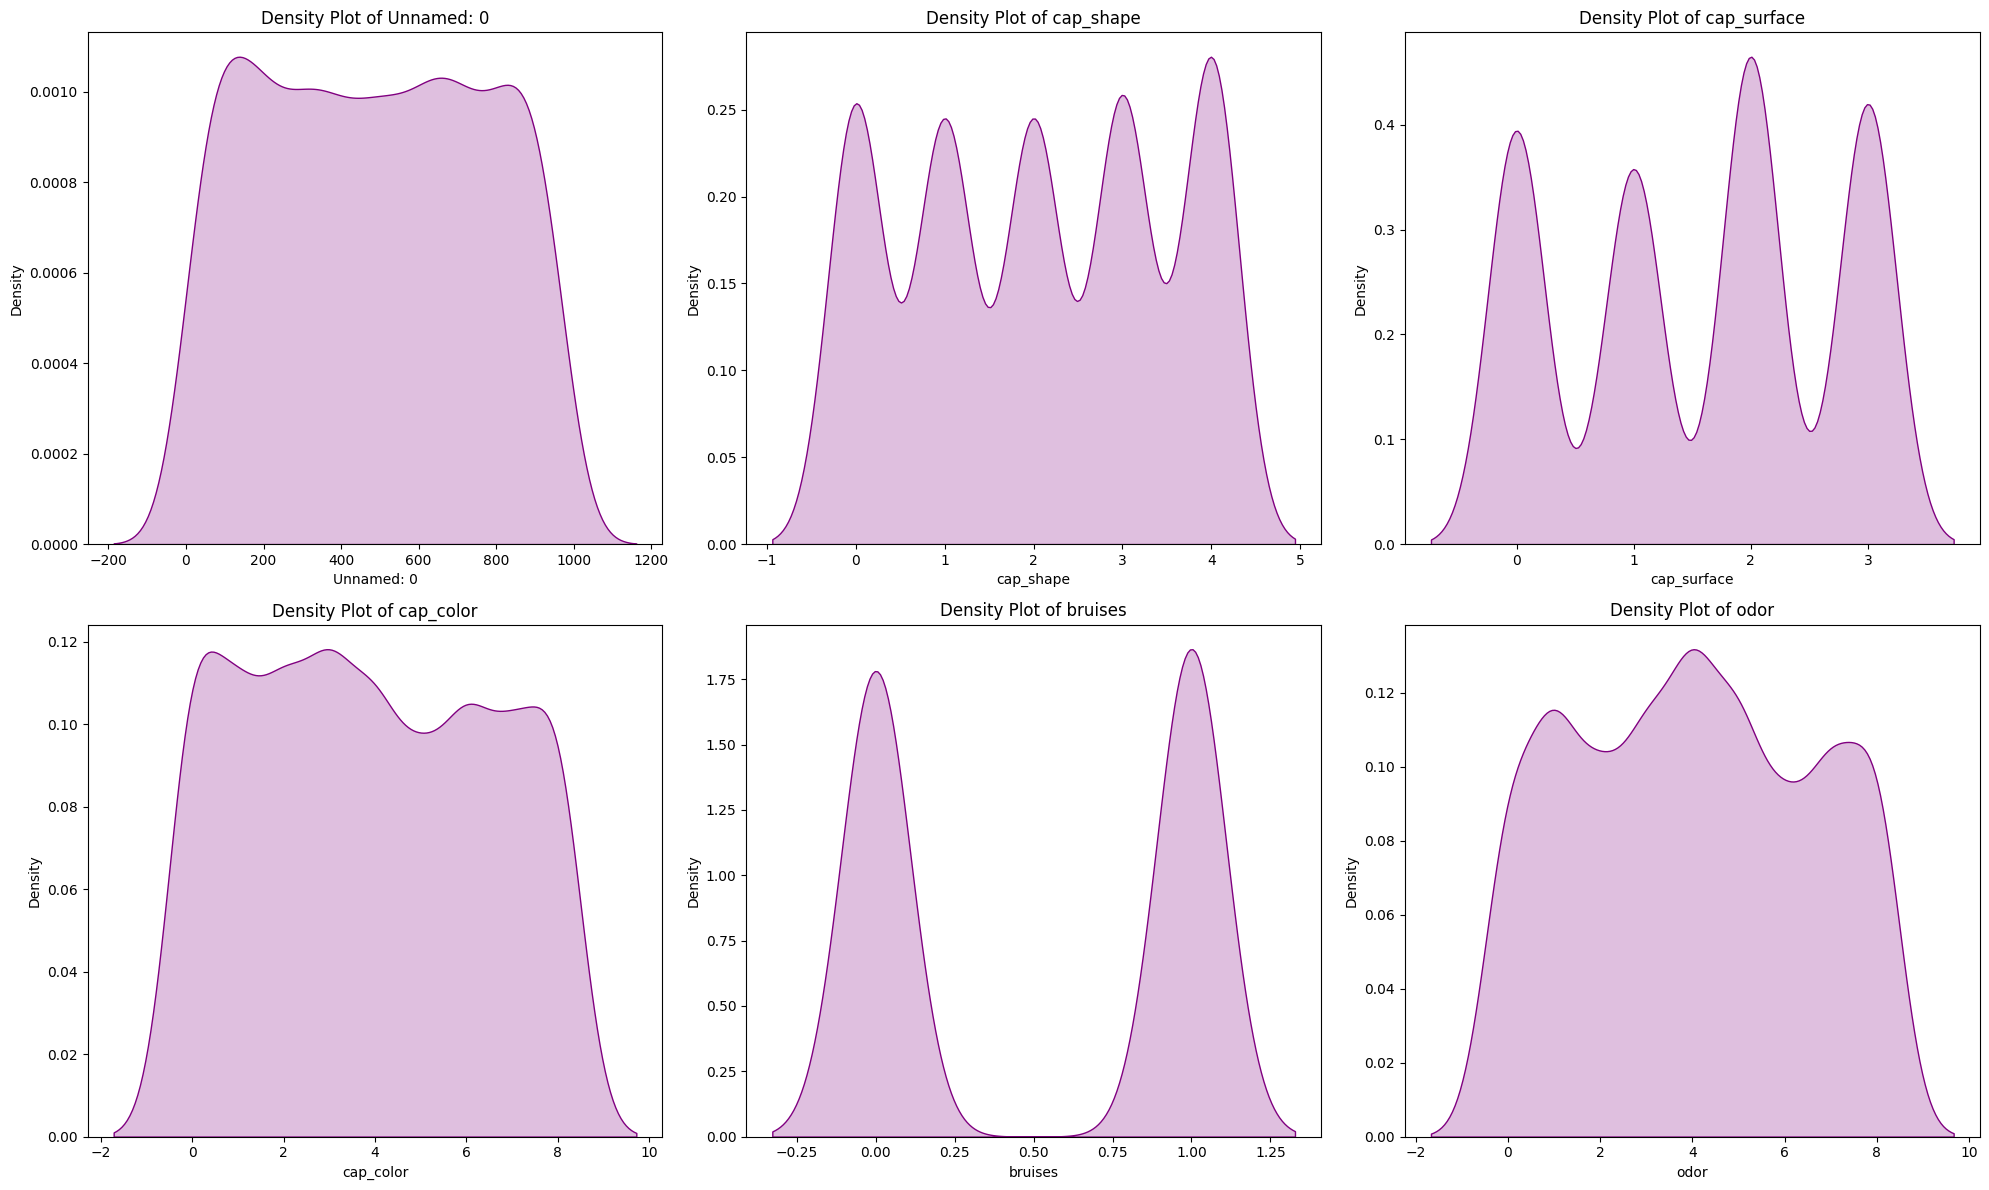

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("mushroom.csv")

# Encode all categorical features as numeric
label_encoders = {}
encoded_df = df.copy()

for column in df.columns:
    le = LabelEncoder()
    encoded_df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Plot box plots for selected encoded features
selected_features = encoded_df.columns[:6]  # Change this slice to view different sets

plt.figure(figsize=(20, 12))
for i, col in enumerate(selected_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=encoded_df[col], color='skyblue')
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

# Plot density plots (KDE)
plt.figure(figsize=(20, 12))
for i, col in enumerate(selected_features):
    plt.subplot(2, 3, i + 1)
    sns.kdeplot(encoded_df[col], fill=True, color='purple')
    plt.title(f'Density Plot of {col}')

plt.tight_layout()
plt.show()

* **Investigate feature correlations to discern relationships within the data.**

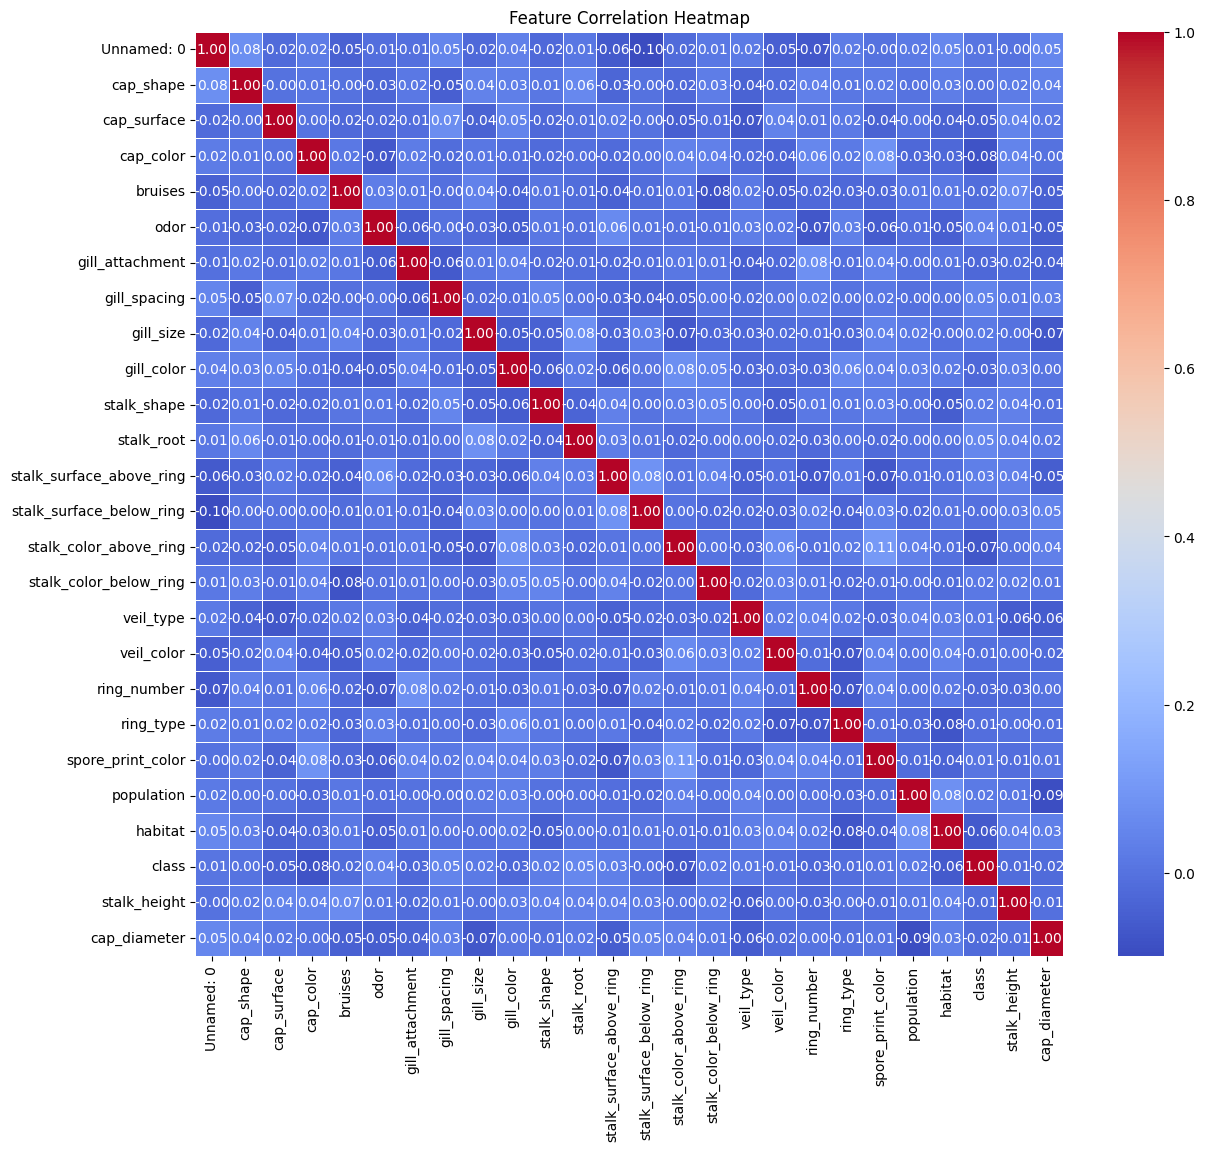

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("mushroom.csv")

# Encode all categorical features numerically
encoded_df = df.copy()
label_encoders = {}

for column in encoded_df.columns:
    le = LabelEncoder()
    encoded_df[column] = le.fit_transform(encoded_df[column])
    label_encoders[column] = le

# Compute the correlation matrix
corr_matrix = encoded_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### **Task 2: Data Preprocessing:**

* **Encode categorical variables if necessary.**

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv("mushroom.csv")

# Create a copy to encode
encoded_df = df.copy()

# Initialize a dictionary to store the encoders (optional, useful for inverse transforms later)
label_encoders = {}

# Encode all object (categorical) columns
for column in encoded_df.columns:
    if encoded_df[column].dtype == 'object':
        le = LabelEncoder()
        encoded_df[column] = le.fit_transform(encoded_df[column])
        label_encoders[column] = le

# encoded_df is now fully numeric
print(encoded_df.head())

   Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0        1167          4            2          7        0     1   
1        1037          4            0          6        0     1   
2         309          3            1          5        1     4   
3         282          0            2          4        1     3   
4         820          3            3          8        1     5   

   gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                1             2          0           7  ...          0   
1                3             1          1           3  ...          1   
2                1             1          0           8  ...          1   
3                3             0          0           6  ...          0   
4                2             1          1           6  ...          1   

   veil_color  ring_number  ring_type  spore_print_color  population  habitat  \
0           0            2          6                  3         

* **Split the dataset into training and testing sets.**

In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load and encode the dataset
df = pd.read_csv("mushroom.csv")
encoded_df = df.copy()

label_encoders = {}
for column in encoded_df.columns:
    le = LabelEncoder()
    encoded_df[column] = le.fit_transform(encoded_df[column])
    label_encoders[column] = le

# Separate features and target
X = encoded_df.drop("class", axis=1)  # Features
y = encoded_df["class"]               # Target

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Display shapes as confirmation
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (1600, 25) (1600,)
Testing set: (400, 25) (400,)


### **Task 3: Data Visualization:**

* **Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.**

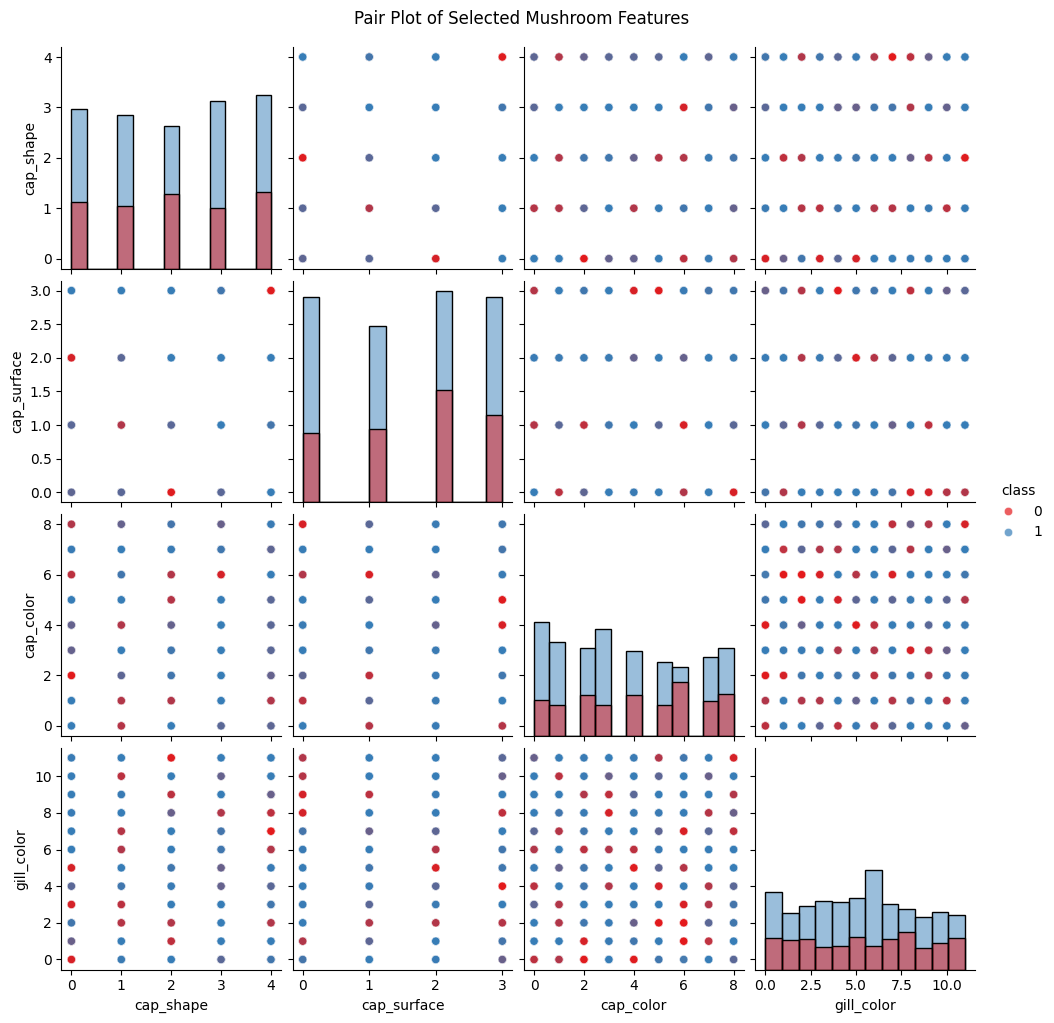

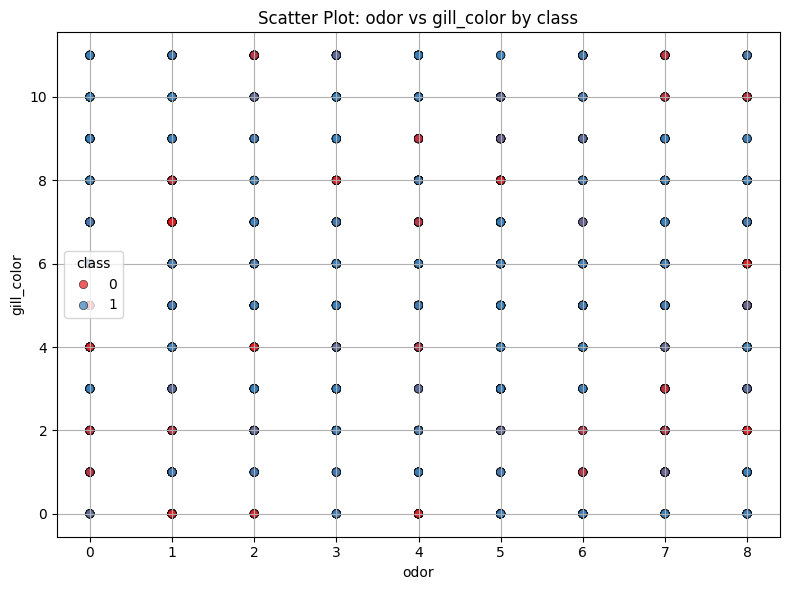

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load and encode the dataset
df = pd.read_csv("mushroom.csv")
encoded_df = df.copy()

# Label encode all categorical columns
for column in encoded_df.columns:
    le = LabelEncoder()
    encoded_df[column] = le.fit_transform(encoded_df[column])

# Select a subset of features for pairplot to avoid clutter
features_subset = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'gill-color']
features_subset = [col.replace('-', '_') if '-' in col else col for col in features_subset]

# Plot pairplot
sns.pairplot(
    data=encoded_df[features_subset],
    hue='class',
    palette='Set1',
    diag_kind='hist',
    plot_kws={'alpha': 0.7}
)
plt.suptitle("Pair Plot of Selected Mushroom Features", y=1.02)
plt.show()

# Scatter plot: choose two features to visualize
x_feature = 'odor'
y_feature = 'gill_color'  # Change 'gill-color' to 'gill_color'
hue_feature = 'class'  # Use color to distinguish classes (edible vs poisonous)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=encoded_df,
    x=x_feature,
    y=y_feature,
    hue=hue_feature,
    palette='Set1',
    alpha=0.7,
    edgecolor='k'
)
plt.title(f"Scatter Plot: {x_feature} vs {y_feature} by {hue_feature}")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(title=hue_feature)
plt.grid(True)
plt.tight_layout()
plt.show()

* **Visualize class distributions to gauge dataset balance or imbalance.**

<ipython-input-7-41bd659a05a5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='class', palette='Set2')


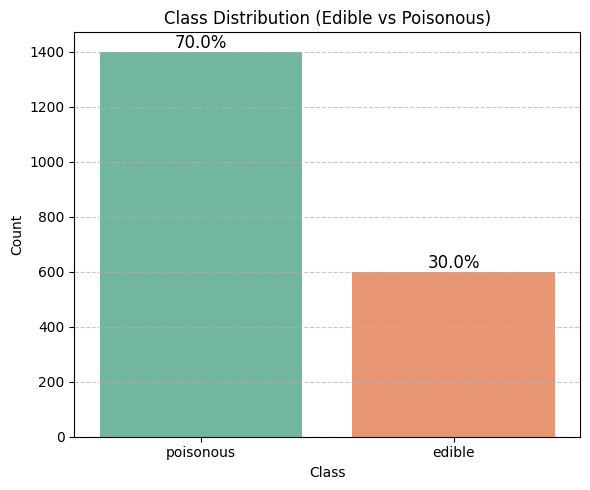

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("mushroom.csv")

# Plot class distribution
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='class', palette='Set2')

# Add annotations
total = len(df)
for p in plt.gca().patches:
    count = p.get_height()
    percentage = f"{100 * count / total:.1f}%"
    plt.gca().annotate(percentage, (p.get_x() + p.get_width() / 2., count),
                       ha='center', va='bottom', fontsize=12)

plt.title("Class Distribution (Edible vs Poisonous)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### **Task 4: SVM Implementation:**

* **Implement a basic SVM classifier using Python libraries like scikit-learn.**

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv("mushroom.csv")

# Initialize and train SVM classifier
svm_model = SVC(kernel='linear')  # You can also try 'rbf' or 'poly'
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[  0 120]
 [  0 280]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400

Accuracy Score: 0.7


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 * **Train the SVM model on the training data.**

In [9]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)  # C=1.0 is default regularization

# Train (fit) the model on the training data
svm_model.fit(X_train, y_train)

# Confirm training is done
print("SVM model training complete.")

SVM model training complete.


* **Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).**

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


# Predict the test set
y_pred = svm_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  # for binary classification
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display results
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")


# Optional: full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy : 0.7000
Precision: 0.7000
Recall   : 1.0000
F1-Score : 0.8235

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **Task 5: Visualization of SVM Results:**

* **Visualize classification results on the testing data.**

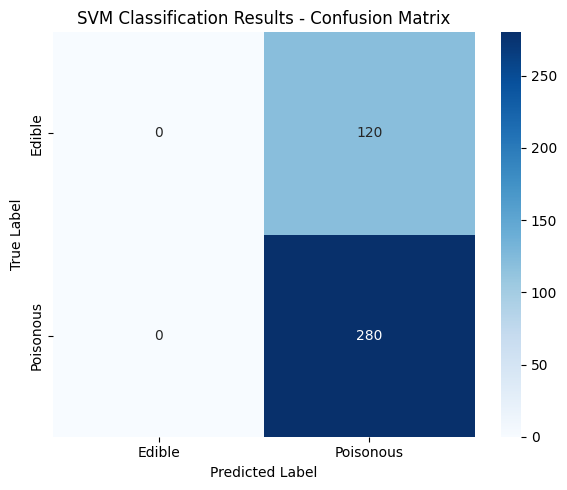

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test data
y_pred = svm_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Edible', 'Poisonous']  # Adjust if label encoding was different

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Classification Results - Confusion Matrix')
plt.tight_layout()
plt.show()

### **Task 6: Parameter Tuning and Optimization:**

* **Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.**

In [12]:
from sklearn.svm import SVC

# Initialize SVM with default parameters
svm = SVC()

# Print available parameters and their default values
print("SVM Parameters and Default Values:")
print(svm.get_params())


SVM Parameters and Default Values:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [13]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset (Iris dataset for example)
data = load_iris()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define SVM model with different kernel types and regularization parameter
svm_model = SVC(kernel='rbf', C=1.0)  # Change 'kernel' to 'linear', 'poly', 'sigmoid' as needed

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Exploring multiple kernel types
kernel_options = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernel_options:
    svm_model = SVC(kernel=kernel, C=1.0)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Kernel: {kernel}, Test Accuracy: {accuracy:.4f}")


Test Accuracy: 1.0000
Kernel: linear, Test Accuracy: 1.0000
Kernel: poly, Test Accuracy: 1.0000
Kernel: rbf, Test Accuracy: 1.0000
Kernel: sigmoid, Test Accuracy: 0.3000


### **Task 7: Comparison and Analysis:**

* **Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).**

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load and encode dataset
df = pd.read_csv("mushroom.csv")
encoded_df = df.copy()
for col in encoded_df.columns:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col])

# Feature and target split
X = encoded_df.drop("class", axis=1)
y = encoded_df["class"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Kernels to evaluate
kernels = ['linear', 'poly', 'rbf']
results = []

# Train and evaluate SVM with each kernel
for kernel in kernels:
    model = SVC(kernel=kernel, C=1.0, gamma='scale')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({'Kernel': kernel, 'Accuracy': acc})

    print(f"\n📌 Kernel: {kernel}")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))

# Summary
results_df = pd.DataFrame(results)
print("\n✅ Accuracy Comparison by Kernel:")
print(results_df.sort_values(by='Accuracy', ascending=False))


📌 Kernel: linear
Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📌 Kernel: poly
Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📌 Kernel: rbf
Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400


✅ Accuracy Comparison by Kernel:
   Kernel  Accuracy
0  linear       0.7
1    poly       0.7
2     rbf       0.7


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


* **Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.**

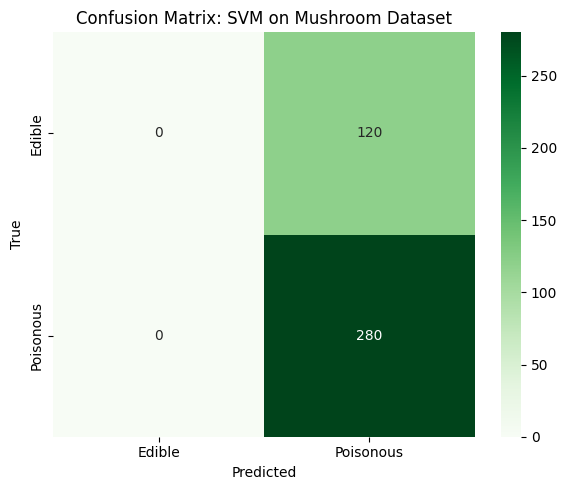

🔍 Classification Report:

              precision    recall  f1-score   support

      Edible       0.00      0.00      0.00       120
   Poisonous       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Edible', 'Poisonous']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: SVM on Mushroom Dataset')
plt.tight_layout()
plt.show()

# Only works if the kernel is linear
# Assuming 'model' from the previous cell holds the desired model
# Choose the model with the best kernel based on your evaluation
best_model = model  # Replace with the actual assignment logic

if best_model.kernel == 'linear':
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    feature_importance = pd.Series(best_model.coef_[0], index=X.columns)
    top_features = feature_importance.abs().sort_values(ascending=False).head(10)

    plt.figure(figsize=(8, 4))
    sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
    plt.title('Top 10 Important Features (Linear SVM)')
    plt.xlabel('Absolute Coefficient Value')
    plt.tight_layout()
    plt.show()

from sklearn.metrics import classification_report

# Evaluate the classifier
print("🔍 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=labels))

* **Discuss practical implications of SVM in real-world classification tasks.**

   
  -->**What is SVM?**

Support Vector Machines (SVMs) are a powerful supervised machine learning algorithm used primarily for classification tasks, but also applicable to regression and outlier detection. The core idea is to find the optimal hyperplane that best separates data points of different classes.

* **How Does SVM Work?**

* **Binary Classification:** SVM tries to find a hyperplane that maximally separates two classes.

* **Support Vectors**: The data points closest to the hyperplane; these define the margin.

* **Margin:** The distance between the hyperplane and the nearest support vectors. SVM aims to maximize this margin.

* **Strengths:**

	1)High Accuracy with Clear Margins
SVMs are particularly effective when there’s a clear margin of separation between classes, making them suitable for tasks like:

	•	Spam detection

	•	Bioinformatics (e.g., cancer classification from gene expression)

	•	Image recognition (e.g., digit classification)

  2)Effective in High-Dimensional Spaces
SVMs perform well when the number of features exceeds the number of samples (common in text or genomic data).

	3)Versatile with Kernel Trick
Through kernel functions (linear, rbf, poly), SVMs can handle non-linear relationships without needing to explicitly transform the data.

	4)Robust to Overfitting (with regularization)
Proper tuning of C and gamma helps prevent overfitting, especially with clean and well-separated data.

* **Limitations:**

	1.	Not Scalable to Very Large Datasets
SVMs are computationally expensive, especially with non-linear kernels and large datasets. They scale poorly in both training time and memory.
	2.	Difficult to Interpret
SVMs (especially with non-linear kernels) are “black-box” models — you can’t easily explain why a particular prediction was made.
	3.	Sensitive to Feature Scaling
Although not a concern with categorical data (like the Mushroom dataset), SVMs often require proper feature normalization when using continuous features.
	4.	Not Ideal for Noisy or Overlapping Classes
When classes overlap heavily or labels are noisy, SVMs may not perform well — they try to find a hard margin which may not exist.
